## Zaawansowane sieci neuronowe

Proste sieci neuronowe są w stanie (jak Państwo widzieli) rozwiązywać nawet bardzo złożone problemy klasyfikacji i aproksymacji przy stosunkowo niewielkim nakładzie pracy ich twórcy (np. w stosunku do wykorzystania metod numerycznych), jednak do najbardziej złożonych zadań potrzebne są sieci specjalnie zaprojektowane do rozwiązywania tych problemów.

## Sieci konwolucyjne

W wypadku zwykłej sieci neuronowej, przetwarzamy obraz przez pocięcie go na kawałki i podanie jako sekwencję wartości, często bardzo dużą i nieuporządkowaną. W rzeczywistości w wypadku grafiki sąsiedztwo pikseli ma bardzo istotne znaczenie (wykrywanie krawędzi, szumów, dużych jednolitych plam barwnych). Sieci konwolucyjne dzielą grafikę na mniejsze części, rozpatrując je osobno za pomocą dyskretnej konwolucji.

### Historia i zastosowanie


#### Inspiracja
W 1959 roku neurofizjolodzy z Harvardu, David H. Hubel i Torsten Wiesel, wprowadzili mikroelektrodę do pierwotnej kory wzrokowej u znieczulonego kota. Następnie wyświetlali wzorce światła i ciemności na ekranie przed kotem i odkryli, że niektóre neurony aktywowały się szybko, gdy były prezentowane linie pod jednym kątem, podczas gdy inne reagowały najlepiej pod innym kątem. Nazwali te neurony „prostymi komórkami”. Jeszcze inne neurony, które nazwali „komórkami złożonymi”, najlepiej reagowały na linie poruszające się pod pewnym kątem w jednym kierunku.

![CatexperimentUrl](https://www.researchgate.net/profile/David-Berga/publication/337360115/figure/fig4/AS:826941796012034@1574169696239/Left-Experimental-setup-from-Hubel-Wiesel-136-137-adapted-from-253-Chapter-11.ppm "catexperiment")

Badania te pokazały, w jaki sposób system wzrokowy buduje obraz z prostych bodźców w bardziej złożone reprezentacje. Wiele sztucznych sieci neuronowych można obecnie postrzegać jako te będące inspirowane badaniami Hubela i Wiesela.

"Oficjalnie" konwolucyjne sieci neuronowe, zwane również **ConVNet (CNN), zostały po raz pierwszy wprowadzone w latach 80**. przez Yanna LeCuna, francuskiego badacza, pracującego obecnie na Courant Institute of Mathematical Sciences na Uniwersytecie Nowojorskim.


#### Zastosowanie
<mark>
- przetwarzanie obrazów i wideo,
- przetwarzanie języka naturalnego (NLP),
- systemy rekomendacyjne.
</mark>
Poniżej zaprezentowano schemat architektury oraz uczenia konwolucyjnej sieci neuronowej.

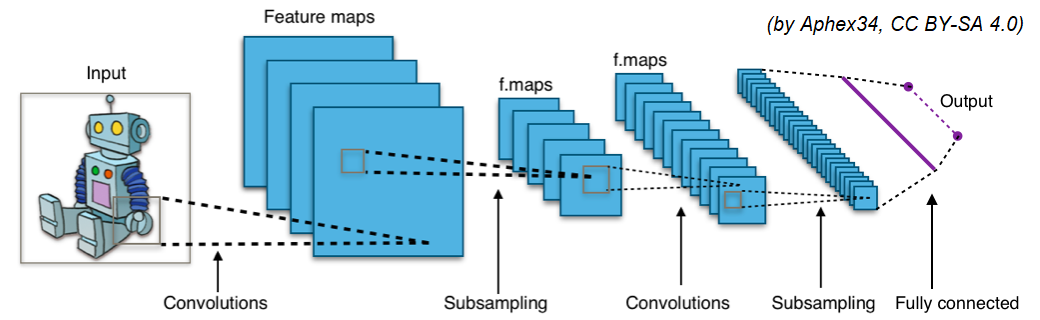

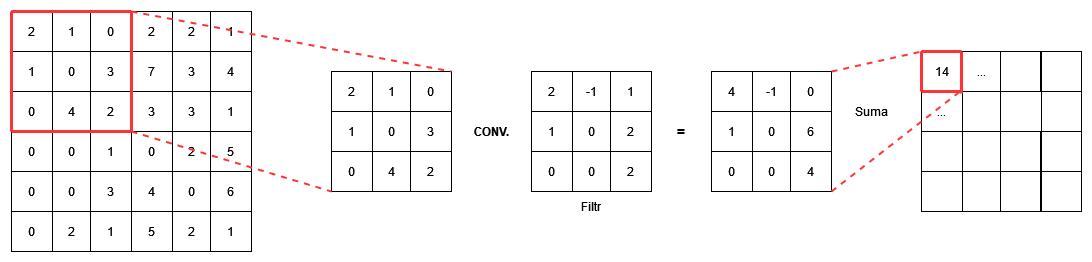

#### Zalety sieci konwolucyjnych:


* Dokonują wysokopoziomowej ekstrakcji cech
* Uczą się szybciej i wymagają mniejszych struktur również dla znacznie większych rozdzielczości i ilości kanałów

## Pakiet PyTorch

PyTorch to jedno z dużych narzędzi do budowania zaawansowanych sieci neuronowych, upraszcza wiele mechanizmów i pozwala wykonywać je "pod maską", posiada też wbudowane implementacje dla wielu istniejących sieci neuronowych.

In [ ]:
import torch

# torch korzysta z tensorów, które w działaniu są podobne do arrayów z numpy:
example_tensor = torch.Tensor([[3.1,7.2,8.6],[3.0,4,-0.3]])
example_tensor

tensor([[ 3.1000,  7.2000,  8.6000],
        [ 3.0000,  4.0000, -0.3000]])

In [ ]:
# pobierzmy zbiór irysów, najłatwiej jest to zrobić w sklearnie, więc z niego skorzystajmy:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify = y, test_size=0.2)

In [ ]:
# mamy już zbiory. Teraz zaimportujmy potrzebne nam rzeczy w torchu

import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

# najczęściej tworzymy sieci neuronowe dziedzicząc je po klasie nn.Module. Zawiera ona wszystkie potrzebne funkcje do tworzenia uczenia sieci neuronowej.
class TorchModel(nn.Module):
  def __init__(self, input_size):
    super(TorchModel, self).__init__()
    # ustalamy kształt sieci. Weźmy 3 warstwy, w pierwszej 80 neuronów, potem 50, na wyjściu 3.
    self.layer1 = nn.Linear(input_size, 80)
    self.layer2 = nn.Linear(80, 50)
    self.layer3 = nn.Linear(50, 3)

  def forward(self, x):
    # ręcznie wpisujemy funkcję wyjścia z sieci
    x = F.relu(self.layer1(x))
    x = F.relu(self.layer2(x))
    x = F.softmax(self.layer3(x), dim=1)
    return x

#tworzymy obiekt klasy TorchModel podając ilość cech wejściowych
model = TorchModel(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters())
loss_function = nn.CrossEntropyLoss()

# możemy obejrzeć model:
model

TorchModel(
  (layer1): Linear(in_features=4, out_features=80, bias=True)
  (layer2): Linear(in_features=80, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)

In [ ]:
# możemy już przejść do faktycznego uczenia:

epochs = 200

# torch jest bardzo czuły na swoje typy. Dane wejściowe domyślnie są typu float, a wyjściowe jako long
# oczywiście torch przyjmuje też tylko swoje tensory jako wejścia i tak też zwraca wyjścia - tensor to taki ulepszony ndarray numpyowy

X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train).long()
y_test_tensor = torch.from_numpy(y_test).long()

# stwórzmy sobie listy do zapisania historii funkcji strat i dokładności klasyfikacji:
loss_history = []
accuracy_train_history = []
accuracy_test_history = []

In [ ]:
# faktyczna pętla uczenia

for epoch in range(epochs):
  # wejście przechodzi przez model
  predicted_y = model(X_train_tensor)
  # liczymy funkcję strat (entropię krzyżową)
  loss = loss_function(predicted_y, y_train_tensor)
  # zerujemy gradient optimizera, żeby nie używał gradientów skumulowanych w poprzednich epokach i przepuszczamy go przez całą sieć
  optimizer.zero_grad()
  loss.backward()
  # aktualizujemy współczynnik uczenia optimizera
  optimizer.step()
  loss_history.append(loss.item())
  # policzmy dokładność (dla danych uczących i testujących)
  # musimy użyć torch.no_grad(), żeby nasze obliczenia nie zostały zapisane jako gradienty
  with torch.no_grad():
    y_pred_train = model(X_train_tensor)
    correct_train = (torch.argmax(y_pred_train, dim=1) == y_train_tensor).type(torch.FloatTensor)
    accuracy_train_history.append(correct_train.mean())

    y_pred_test = model(X_test_tensor)
    correct_test = (torch.argmax(y_pred_test, dim=1) == y_test_tensor).type(torch.FloatTensor)
    accuracy_test_history.append(correct_test.mean())

# zobaczmy accuracy na zbiorze testowym w ostatniej epoce:
accuracy_test_history[-1]

tensor(0.9667)

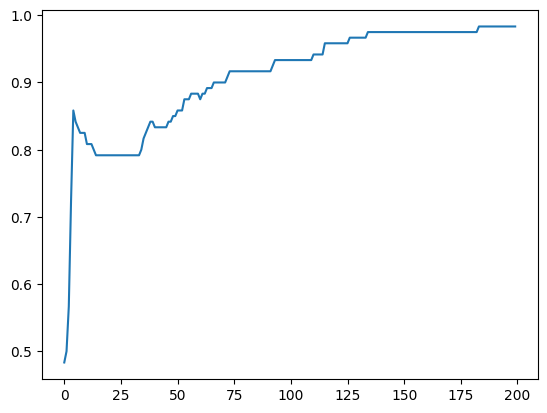

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(accuracy_train_history)

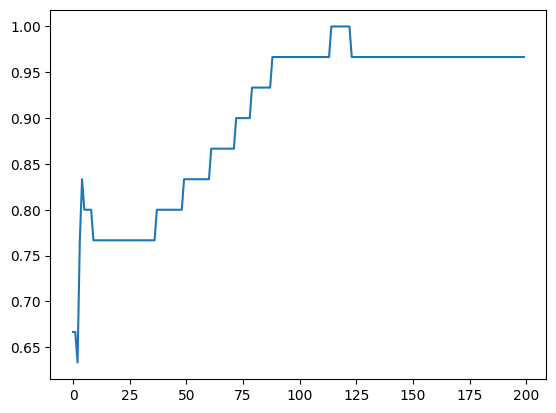

In [ ]:
plt.plot(accuracy_test_history)

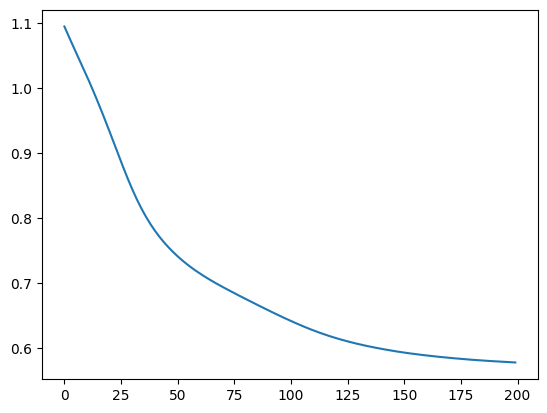

In [ ]:
plt.plot(loss_history)

## Sieci konwolucyjne


### Pojęcie konwolucji

Konwolucja (operacja splotu, mnożenie całkowe, splot całkowy) - działanie określone dla dwóch funkcji, które w wyniku daje inną funkcję.

$$h(n)= f(t)∗g(t)= \int_{-\infty}^{\infty}      f(τ) · g(t − τ)dτ $$



$$ h[n]=f[n]∗g[n]= \sum_{m = -\infty}^{\infty}f[m]·g[n−m]$$

Konwolucja na obrazach jest operacją dyskretną i zachodzi w dwóch bądź więcej wymiarach (wykonywana jest na pikselach).

### Kernele (filtry)

Operacja konwolucji w uproszczeniu jest przekształceniem macierzowym fragmentów zdjęcia, które ma na celu wydobycie informacji o konkretnych cechach obrazu.

Przykładem takiej operacji jest stworzenie negatywu zdjęcia. Jest to po prostu przemnożenie zdjęcia przez macierz -1, co doprowadzi do odwrócenia kolorów. Wspomniana macierz nazywa się filtrem (kernelem). Dobiera się je w taki sposób aby wyciągnąć pewną informację.

Poniżej przedstawiono sposób działania kernela o rozmiarze 3x3.

![KernelUrl](https://miro.medium.com/v2/resize:fit:1052/1*GcI7G-JLAQiEoCON7xFbhg.gif "kernel")

Przed działaniem filtra:
Oryginalny rozmiar obrazka: torch.Size([3, 601, 591])


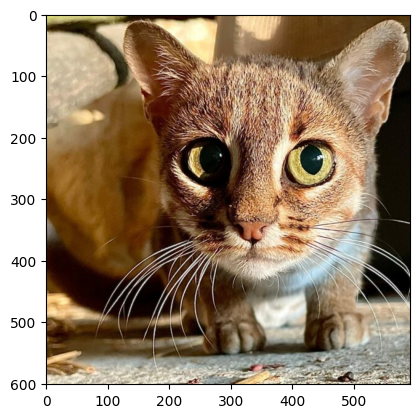

In [ ]:
# pobranie z sieci obrazka kotka rudego (Prionailurus rubiginosus)
import urllib.request
from PIL import Image
import torchvision.transforms as T

urllib.request.urlretrieve(
  'https://orientarium.lodz.pl/assets/2022/02/kotek-rudy-591x601.jpg',
   "kot_rudy.png")

# wczytanie obrazka
print('Przed działaniem filtra:')
img = Image.open('kot_rudy.png')
plt.imshow(img)

# przekształcenie w torch tensor
img = T.ToTensor()(img)
print("Oryginalny rozmiar obrazka:", img.size())

Po działaniu filtra:


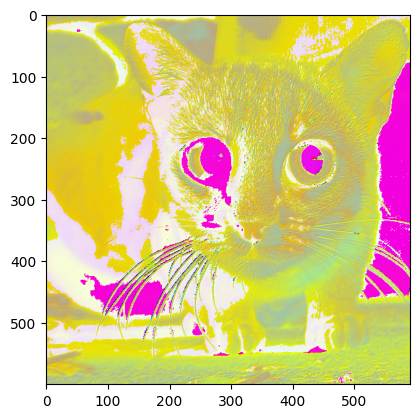

In [ ]:
# potrzebne importy
import torchvision

# przekształcenie na tensor 4D
img = img.unsqueeze(0)
# zdefiniowanie warstwy konwolucyjnej
'''conv = nn.Conv2d(in_channels, out_channels, kernel_size)'''
conv = torch.nn.Conv2d(3, 3, 2)

# zaaplikowanie konwolucji na obrazku
img = conv(img)

# przekształcenie na 3D
img = img.squeeze(0)

# przekształcenie formatu
img = T.ToPILImage()(img)

# wyświetlenie obrazu kota
print('Po działaniu filtra:')
plt.imshow(img)

# należy pamiętać, że z każdą inicjalizacją plik może być inny ze względu na różne inicjalne wagi i biasy

#### Padding (wypełnienie)

Cechą charakterystyczną warstw konwolucyjnych jest to, że mają tendencję do gubienia pikseli na obwodzie obrazu.Piksele w rogach są prawie w ogóle nieużywane. Problem ten można rozwiązać stosując padding, czyli wypełnienie. Przykładową metodą paddingu może być dodanie "zerowych" pikseli na bokach obrazka.

![PaddingUrl](https://d2l.ai/_images/conv-pad.svg "padding")



#### Stride (krok)

Do liczby wierszy i kolumn o które przesuwamy filtr odnosimy się jako krok ("stride"). Najprostszym zabiegiem jest użycie kroku 1. Możliwe jest jednak zastosowanie kroku o większej wartości.

![StrideUrl](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*y3Ydr1oCHRfOegWxZITIOA.png "stride")



#### Powyższe operacje warto przedstawić na realnym obrazku

### Pooling (subsampling)

Najbardziej popularnym rodzajem poolowania jest Max Pooling. Jest to operacja, która oblicza maksymalną wartości z wyliczonej już w warstwie konwolucyjnej mapy obiektów. Jest standardowo używany właśnie po warstwie splotu.

Celem operacji poolingu jest stopniowe zmniejszanie rozmiaru obrazu, co zmniejsza liczbę parametrów do wytrenowania. Oznacza to więc, że sieć trenuje się krócej.

![maxpoolUrl](https://lh3.googleusercontent.com/hpsr13DyQ9N7fWvXH--YvJgeALOHkwbT3aH7CUc0_b47uW9dQ5y2lsIoep9Y0MOkMjYcxv3yxhdf4_11SmHFfxKTCv-83OY0eJ8laKa6QKCr7iuJx5FKx1JSOQW551WijVuc3x72ear2euMT "maxpool")


Idea poolingu polega na tym, że kilka pikseli np. rozmiar 2×2 mapujemy na 1 piksel.

Zobaczmy teraz jak wygląda uczenie sieci konwolucyjnej.

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torchvision import datasets

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:05<00:00, 28.6MB/s]


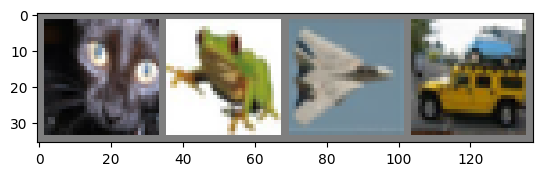

cat   frog  plane car  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# wyświetlenie obrazka

def imshow(img):
    img = img / 2 + 0.5     # denormalizacja jest konieczna do wyświetlenia
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# znajdź losowe obrazki
dataiter = iter(trainloader)
images, labels = next(dataiter)

# wyświetl obrazki i ich podpisy
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch.nn.functional as F

class MyCNN(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = torch.nn.Conv2d(3, 6, 5)
    self.pool = torch.nn.MaxPool2d(2, 2)
    self.conv2 = torch.nn.Conv2d(6, 16, 5)
    self.linear1 = torch.nn.Linear(16*5*5,256)    # warstwy liniowe - feed_forward
    self.linear2 = torch.nn.Linear(256,84)
    self.linear3 = torch.nn.Linear(84,10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1) # splaszczamy do 1 wymiaru
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x

net = MyCNN()

In [ ]:
cross_entrophy = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters())

epochs = 10
accuracy_train_history = []
accuracy_test_history = []
loss_history = []

for epoch in range(epochs):

  running_loss = 0

  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    optimizer.zero_grad()

    losses = []

    outputs = net(inputs)
    loss = cross_entrophy(outputs, labels)
    loss.backward()
    optimizer.step()
    losses.append(loss.item()/2000)


    running_loss += loss.item()
    if i % 2000 == 1999:
        print(f'[Epoka {epoch + 1}/{epochs}, batch {i + 1:5d}/{len(trainloader)}] funkcja strat: {running_loss / 2000:.3f}')
        running_loss = 0.0

  loss_history.append(np.mean(losses))

  with torch.no_grad():
    total_tested = 0
    total_correct = 0
    total_tested_train = 0
    total_correct_train = 0
    for i, data in enumerate(testloader, 0):
      images, labels = data
      outputs = net(images)
      _, predicted = torch.max(outputs.data, 1)
      total_tested += labels.size(0)
      total_correct += (predicted == labels).sum().item()
    for i, data in enumerate(trainloader, 0):
      images, labels = data
      outputs = net(images)
      _, predicted = torch.max(outputs.data, 1)
      total_tested_train += labels.size(0)
      total_correct_train += (predicted == labels).sum().item()


    accuracy_test_history.append(total_correct / total_tested)
    accuracy_train_history.append(total_correct_train / total_tested_train)

print('Trenowanie zakończone')

[Epoka 1/10, batch  2000/12500] funkcja strat: 0.608
[Epoka 1/10, batch  4000/12500] funkcja strat: 0.609
[Epoka 1/10, batch  6000/12500] funkcja strat: 0.584
[Epoka 1/10, batch  8000/12500] funkcja strat: 0.560
[Epoka 1/10, batch 10000/12500] funkcja strat: 0.593
[Epoka 1/10, batch 12000/12500] funkcja strat: 0.590
[Epoka 2/10, batch  2000/12500] funkcja strat: 0.472
[Epoka 2/10, batch  4000/12500] funkcja strat: 0.544
[Epoka 2/10, batch  6000/12500] funkcja strat: 0.540
[Epoka 2/10, batch  8000/12500] funkcja strat: 0.545
[Epoka 2/10, batch 10000/12500] funkcja strat: 0.579
[Epoka 2/10, batch 12000/12500] funkcja strat: 0.608
[Epoka 3/10, batch  2000/12500] funkcja strat: 0.495
[Epoka 3/10, batch  4000/12500] funkcja strat: 0.538
[Epoka 3/10, batch  6000/12500] funkcja strat: 0.528
[Epoka 3/10, batch  8000/12500] funkcja strat: 0.543
[Epoka 3/10, batch 10000/12500] funkcja strat: 0.549
[Epoka 3/10, batch 12000/12500] funkcja strat: 0.561
[Epoka 4/10, batch  2000/12500] funkcja strat:

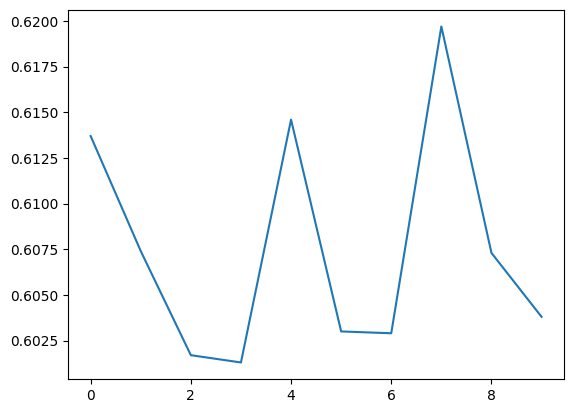

In [ ]:
plt.plot(accuracy_test_history)

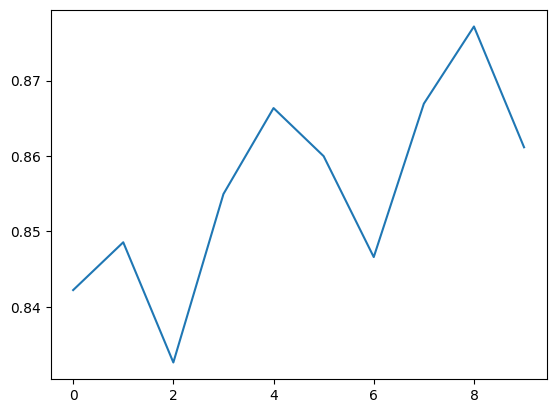

In [ ]:
plt.plot(accuracy_train_history)

CNN jest to rodzaj sieci neuronowych specjalizujących sie w **pattern matching**. Więc działają głównie na **image data**.

Zamiast numerycznych wartości przekazywanych na wejściu i wyjściu poszczególnych warstw sieci neuronowej, tutaj mamy filtry przeszukujące konkretne cechy w obrazkach.

### Obliczenia na kartach graficznych

Ze względu na zoptymalizowanie pod kątem mnożenia macierzy, karty graficzne świetnie nadają się do uczenia sieci neuronowych, które jak już Państwo wiedzą można sprowadzić m.in. właśnie do mnożenia macierzy. W torch oraz innych podobnych bibliotekach można uzyskać dostęp do obliczeń na GPU (CUDA) w bardzo łatwy sposób.

In [ ]:
import torch
print('Czy mam CUDA?', torch.cuda.is_available() )

x = torch.cuda.current_device() # zwraca ID urządzenia
print('Nazwa GPU x:',torch.cuda.get_device_name(x))

print('Wersja CUDNN:', torch.backends.cudnn.version())
print('Ilość urządzeń CUDA:', torch.cuda.device_count())
print('Nazwa urządzenia CUDA: ',torch.cuda.get_device_name(0))
print('Pamięć urządzenia CUDA [GB]:',torch.cuda.get_device_properties(0).total_memory/1e9)

Czy mam CUDA? True
Nazwa GPU x: Tesla T4
Wersja CUDNN: 90300
Ilość urządzeń CUDA: 1
Nazwa urządzenia CUDA:  Tesla T4
Pamięć urządzenia CUDA [GB]: 15.828320256


In [ ]:
# przeniesienie wektora na kartę graficzną odbywa się za pomocą metody "to"

tens = torch.Tensor([0.,0.5,1,2,7])
# x to nasz device
tens.to(x)

# wszystkie wektory w uczeniu muszą być na jednym urządzeniu.

tensor([0.0000, 0.5000, 1.0000, 2.0000, 7.0000], device='cuda:0')

## Zadania do samodzielnego wykonania

1.

Proszę pobrać zbiór fasion MNIST (torchvision.datasets.FashionMNIST) i zaproponować sieć konwolucyjną do jego klasyfikacji. Dla co najmniej trzech architektur proszę wypisać macierz pomyłek i wykresy funkcji strat podczas uczenia. Proszę spróbować w każdym wypadku podać przynajmniej jeden źle zaklasyfikowany obrazek.

2.

Dla jednej wybranej architektury, proszę porównać czas uczenia sieci na CPU i na GPU, do czego mogą Państwo wykorzystać własną kartę NVidii lub zasoby Colaba. W Runtime->Change Runtime Type musi być zaznaczona opcja "T4 GPU".

3*.

Dla zainteresowanych - proszę doczytać o mechanizmie dropoutu (https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html, https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/) i spróbować zastosować mechanizm dropoutu do stworzonej sieci neuronowej.

Przydatne linki:

https://www.cs.toronto.edu/~kriz/cifar.html

